In [1]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import apache_log_parser
from pprint import pprint

import re

In [2]:
matplotlib.__version__

'2.0.0'

# Assignment 1: Web Server Log Analysis

Before we begin, make sure you have the following files:

    data/NASA_access_log_Jul95
    data/GeoIP.dat

## Part 1: Load and parse the data


For this part, you will load the data and store them in as a **list of python dictionaries**. Here are the first few lines of the log file.

```
199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] "GET /history/apollo/ HTTP/1.0" 200 6245
unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] "GET /shuttle/countdown/ HTTP/1.0" 200 3985
199.120.110.21 - - [01/Jul/1995:00:00:09 -0400] "GET /shuttle/missions/sts-73/mission-sts-73.html HTTP/1.0" 200 4085
burger.letters.com - - [01/Jul/1995:00:00:11 -0400] "GET /shuttle/countdown/liftoff.html HTTP/1.0" 304 0
```

Below is an example formatting string and a short description of each element:
    
    format = r'%h %l %u %t \"%r\" %>s %b'
    
where

    %h          - remote host (ie the client IP)
    %l          - identity of the user determined by identd (not usually used since not reliable)
    %u          - user name determined by HTTP authentication
    %t          - time the server finished processing the request.
    %r          - request line from the client. ("GET / HTTP/1.0")
    %>s         - status code sent from the server to the client (200, 404 etc.)
    %b          - size of the response to the client (in bytes)
    

Remember we want the data to be a *list of dictionaries* as shown below:

    data = [
    {'%>s': '200',
     '%b': '6245',
     '%h': '199.72.81.55',
     '%l': '-',
     '%r': 'GET /history/apollo/ HTTP/1.0',
     '%t': '[01/Jul/1995:00:00:01 -0400]',
     '%u': '-'},
    {'%>s': '200',
     '%b': '3985',
     '%h': 'unicomp6.unicomp.net',
     '%l': '-',
     '%r': 'GET /shuttle/countdown/ HTTP/1.0',
     '%t': '[01/Jul/1995:00:00:06 -0400]',
     '%u': '-'},
     ...
    ]


### Remarks 
 - There are some log entries that are malformed. You may ignore them.
 - This Python package can be useful: `conda install -c auto apache-log-parser=1.3.0`
 

In [ ]:
sample = "199.72.81.55 - - [01/Jul/1995:00:00:01 -0400] \"GET /history/apollo/ HTTP/1.0\" 200 6245 unicomp6.unicomp.net - - [01/Jul/1995:00:00:06 -0400] \"GET /shuttle/countdown/ HTTP/1.0\" 200 3985"

In [ ]:
re.match("\d", sample)

In [ ]:
# import apache_log_parser
# from pprint import pprint
# from multiprocessing import Pool

# line_parser = apache_log_parser.make_parser("%h <<%P>> %t %Dus \"%r\" %>s %b  \"%{Referer}i\" \"%{User-Agent}i\" %l %u")
# log_line_data = line_parser('127.0.0.1 <<6113>> [16/Aug/2013:15:45:34 +0000] 1966093us "GET / HTTP/1.1" 200 3478  "https://example.com/" "Mozilla/5.0 (X11; U; Linux x86_64; en-US; rv:1.9.2.18)" - -')
# from pprint import pprint
# pprint(log_line_data)


In [3]:
# Fill code here

# p = Pool(4)
data = []
myFormat = '%h %l %u %t \"%r\" %>s %b'
lineParser = apache_log_parser.make_parser(myFormat)
keyMap = {"remote_host": "%h", "remote_logname": "%l", "remote_user": "%u", "time_recieved_datetimeobj": "%t",
            "request_first_line": "%r", "status": "%>s", "response_bytes_clf": "%b"}
with open("data/NASA_access_log_Jul95", 'r') as f:
    
    for i, line in enumerate(f):
        try:
            parseLine = lineParser(line)
            line = {}
            for key in keyMap.keys():
                line[keyMap[key]] = parseLine[key]
            data += [line]
        except:
            pass
#         if i > 10:
#             break


In [3]:
data[:2]

[{'%>s': '200',
  '%b': '6245',
  '%h': '199.72.81.55',
  '%l': '-',
  '%r': 'GET /history/apollo/ HTTP/1.0',
  '%t': datetime.datetime(1995, 7, 1, 0, 0, 1),
  '%u': '-'},
 {'%>s': '200',
  '%b': '3985',
  '%h': 'unicomp6.unicomp.net',
  '%l': '-',
  '%r': 'GET /shuttle/countdown/ HTTP/1.0',
  '%t': datetime.datetime(1995, 7, 1, 0, 0, 6),
  '%u': '-'}]

In [5]:
# Expected output
data[:2]

[{'%>s': '200',
  '%b': '6245',
  '%h': '199.72.81.55',
  '%l': '-',
  '%r': 'GET /history/apollo/ HTTP/1.0',
  '%t': datetime.datetime(1995, 7, 1, 0, 0, 1),
  '%u': '-'},
 {'%>s': '200',
  '%b': '3985',
  '%h': 'unicomp6.unicomp.net',
  '%l': '-',
  '%r': 'GET /shuttle/countdown/ HTTP/1.0',
  '%t': datetime.datetime(1995, 7, 1, 0, 0, 6),
  '%u': '-'}]

## Part 2: Create the Data Frame

In this part, we will create a data frame from `data` and clean it up a little bit. First, create a data frame called `df` from `data`

In [4]:
# Fill code here
df = pd.DataFrame(data)
df.columns = ["Status", "b", "IP", "%I", "Request", "Time", "%u"]

Now, show the first two line of `df`

In [5]:
# Fill code here
df.head(2)

,Status,b,IP,%I,Request,Time,%u
0,200,6245,199.72.81.55,-,GET /history/apollo/ HTTP/1.0,1995-07-01 00:00:01,-
1,200,3985,unicomp6.unicomp.net,-,GET /shuttle/countdown/ HTTP/1.0,1995-07-01 00:00:06,-


In [ ]:
# Expected output

Rename the columns to `Status`, `b`, `IP`, `Request`, and `Time`. Remove all other columns.

In [7]:
# Fill code here
df = df[["IP", "Request", "Status", "Time", "b"]]
df.head(5)

,IP,Request,Status,Time,b
0,199.72.81.55,GET /history/apollo/ HTTP/1.0,200,1995-07-01 00:00:01,6245
1,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0,200,1995-07-01 00:00:06,3985
2,199.120.110.21,GET /shuttle/missions/sts-73/mission-sts-73.ht...,200,1995-07-01 00:00:09,4085
3,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0,304,1995-07-01 00:00:11,0
4,199.120.110.21,GET /shuttle/missions/sts-73/sts-73-patch-smal...,200,1995-07-01 00:00:11,4179


In [ ]:
# Expected output

Next, Convert Time column to datetime format and make an index out of it. Use `pd.to_datetime()`

In [5]:
# Fill code here
df = df.set_index(["Time"])
df = df[["Status", "b", "IP", "Request"]]

Change `Status` variable to type `int`. Use `.astype()`

In [6]:
# Fill code here
df["Status"] = df["Status"].astype(int)

Your data frame should have the following format

In [11]:
df.head()

,Status,b,IP,Request
Time,,,,
1995-07-01 00:00:01,200,6245,199.72.81.55,GET /history/apollo/ HTTP/1.0
1995-07-01 00:00:06,200,3985,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0
1995-07-01 00:00:09,200,4085,199.120.110.21,GET /shuttle/missions/sts-73/mission-sts-73.ht...
1995-07-01 00:00:11,304,0,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0
1995-07-01 00:00:11,200,4179,199.120.110.21,GET /shuttle/missions/sts-73/sts-73-patch-smal...


In [ ]:
# DO NOT CHANGE/RERUN
# df.head()

Some of the rows in the *b* column contain '-' string, so we can't convert them with *astype*. We can apply a custom function to this column, that will convert all dashes to NaN, and the rest to floats, additionally converting from bytes to megabytes:

In [7]:
def dash2nan(x):
    if x == '-':
        x = np.nan
    else:
        x = float(x)/1048576.
    return x

Apply the above fuction to `b` column of `df`. Try using `.apply()`

In [8]:
# Fill code here
df["b"] = df["b"].apply(dash2nan)

Now our data frame is ready!

## Part 3: Traffic analysis

First, plot the response size over time from 9am to 10am on Jul 13, 1995. Similar to the following plot:

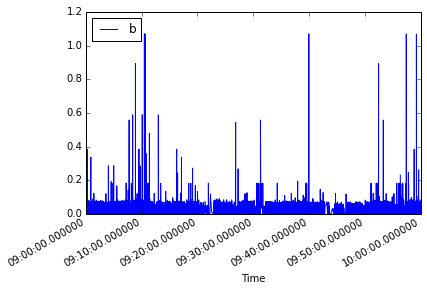

In [17]:
# Fill code here
start = "1995-07-13 09:00:00" <= df.index
end = "1995-07-13 10:00:00" >= df.index
indexing = np.logical_and(start, end)
df[["b"]][indexing].plot()

In [ ]:
# Expected output

Next, use `.resample()` along with `.sum()` to resample the data and plot the traffic over time for all days. Use '10T' (every 10 minutes) as the sampling rate.

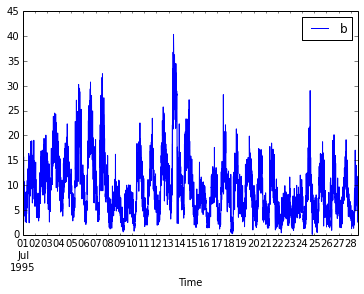

In [18]:
# Fill code here
# Fill code here
# start = "1995-07-13 09:00:00" <= df.index
# end = "1995-07-13 10:00:00" >= df.index
# indexing = np.logical_and(start, end)
df[["b"]].resample("10T").sum().plot()

In [ ]:
# Expected output

Now try to zoom into 13 Jul 1995.

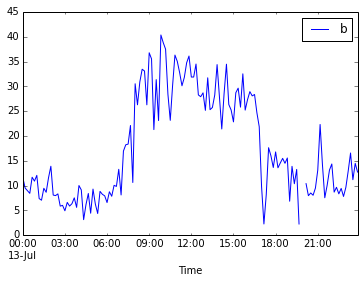

In [19]:
# Fill code here
start = "1995-07-13 00:00:00" <= df.index
end = "1995-07-13 23:59:59" >= df.index
indexing = np.logical_and(start, end)
df[["b"]][indexing].resample("10T").sum().plot()

In [ ]:
# Expected output

In [20]:
# Fill code here
indexing = df["b"] >= 3.0
df[indexing]

,Status,b,IP,Request
Time,,,,
1995-07-07 10:28:56,200,3.009318,spider.tbe.com,GET /statistics/1995/bkup/Mar95_full.html HTTP...
1995-07-07 14:03:32,200,6.507812,derec,GET /shuttle/countdown/video/livevideo.jpeg HT...
1995-07-09 09:22:14,200,3.009318,netspace.net.au,GET /statistics/1995/bkup/Mar95_full.html HTTP...
1995-07-13 14:38:43,200,3.009318,acf4.nyu.edu,GET /statistics/1995/bkup/Mar95_full.html HT...
1995-07-14 09:11:29,200,3.009318,163.206.89.4,GET /statistics/1995/bkup/Mar95_full.html HTTP...
1995-07-17 13:31:01,200,3.009318,jcj8363.dukepower.com,GET /statistics/1995/bkup/Mar95_full.html HT...
1995-07-22 13:08:18,200,3.009318,wuzza.harvard.edu,GET /statistics/1995/bkup/Mar95_full.html HT...
1995-07-25 17:58:56,200,3.009318,198.122.135.40,GET /statistics/1995/bkup/Mar95_full.html HT...


Let's find out large requests. Show requests that has response biggger than 3MB.

In [ ]:
# Expected output

what is the typical size of the server's response? Make a histogram of response sizes smaller than 3MB. Set number of bins to 10.

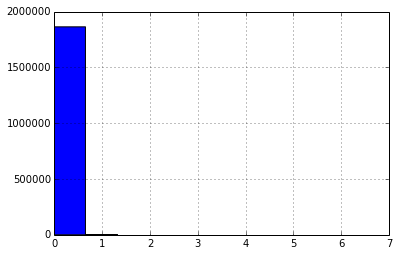

In [21]:
# Fill code here
df["b"].hist()

In [ ]:
# Expected output

So most of the files are less than 0.5 MB large. In fact they are even smaller. Show a histogram of responses sizes smaller than 0.05 MB. Set number of bins to 30.

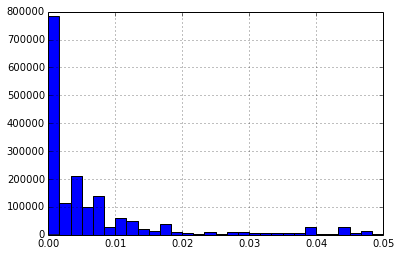

In [22]:
# Fill code here
indexing = df["b"] <= 0.05
df["b"][indexing].hist(bins=30)

In [ ]:
# Expected output

Very small responses can be all kinds of stuff, but larger ones are probably some relatively big files. Let's have a look at histogram of response sizes between 0.2 and 0.25 MB. Set number of bins to 100.

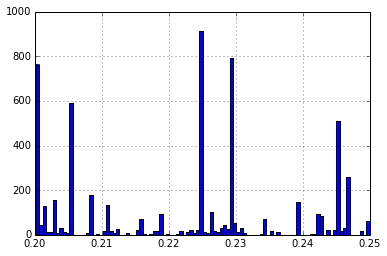

In [23]:
# Fill code here
fm = df["b"] <= 0.25
to = df["b"] >= 0.2
indexing = np.logical_and(fm, to)
df["b"][indexing].hist(bins=100)

In [ ]:
# Expected output

We now can locate the size of the file more precisely, and find out their names. Show the entries that have response size between 0.22 and 0.224 MB.

In [24]:
# Fill code here
to = df["b"] <= 0.224
fm = df["b"] >= 0.22
indexing = np.logical_and(fm, to)
df[indexing]

,Status,b,IP,Request
Time,,,,
1995-07-01 08:39:58,200,0.223356,131.182.28.171,GET /shuttle/missions/sts-51/sts-51-patch.jpg ...
1995-07-02 11:17:25,200,0.223778,landon.iag.net,GET /news/sci.space.news/archive/sci-space-new...
1995-07-02 15:14:26,200,0.223009,www-d3.proxy.aol.com,GET /shuttle/missions/sts-50/sts-50-patch.jpg ...
1995-07-02 15:20:21,200,0.223356,www-d3.proxy.aol.com,GET /shuttle/missions/sts-51/sts-51-patch.jpg ...
1995-07-03 00:45:50,200,0.223356,atropos.jf.intel.com,GET /shuttle/missions/sts-51/sts-51-patch.jpg ...
1995-07-03 01:25:14,200,0.223778,dd12-003.compuserve.com,GET /news/sci.space.news/archive/sci-space-new...
1995-07-03 16:46:37,200,0.223356,www-b6.proxy.aol.com,GET /shuttle/missions/sts-51/sts-51-patch.jpg ...
1995-07-03 22:02:04,200,0.221816,gemini.tntech.edu,GET /news/sci.space.news/archive/sci-space-new...
1995-07-05 21:15:16,200,0.223778,ad09-066.compuserve.com,GET /news/sci.space.news/archive/sci-space-new...


In [ ]:
# Expected output

## Part 4 : Server status codes

I would like to know how different server responses are distributed through time. Create a new Data Frame that counts the number of requests per status in every 2 hour time spans.

```
HTTP Status Code
----------------
200 - OK
302 - Found
304 - Not Modified
400 - Bad Request
403 - Forbidden 
404 - Not Found
500 - Internal Server Error
501 - Not Implemented
```

In [12]:

codeMap = {
200 : "OK",
302 : "Found",
304 : "Not Modified",
400 : "Bad Request",
403 : "Forbidden" ,
404 : "Not Found",
500 : "Internal Server Error",
501 : "Not Implemented"
}

statusMap = {}
for key in codeMap.keys():
    indexing = df[["Status"]] == key
    tmp = df[["Status"]][indexing].resample("2H").count()
    tmp.columns = [codeMap[key]]
    statusMap[key] = tmp

In [13]:
newDF = pd.DataFrame(index=statusMap[200].index)

In [131]:
for key in codeMap.keys():
    newDF.loc[:, codeMap[key]] = statusMap[key]

In [133]:
newDF.head()

,OK,Not Modified,Bad Request,Forbidden,Not Found,Not Implemented,Internal Server Error,Found
Time,,,,,,,,
1995-07-01 00:00:00,5915,328,0,0,34,0,0,292
1995-07-01 02:00:00,3603,236,0,0,28,0,0,135
1995-07-01 04:00:00,2517,198,0,0,19,0,0,91
1995-07-01 06:00:00,2684,261,0,0,6,0,0,134
1995-07-01 08:00:00,3565,296,0,0,9,0,0,153


In [136]:
print newDF.columns

Index([u'OK', u'Not Modified', u'Bad Request', u'Forbidden', u'Not Found',
       u'Not Implemented', u'Internal Server Error', u'Found'],
      dtype='object')


We plot all values at once:

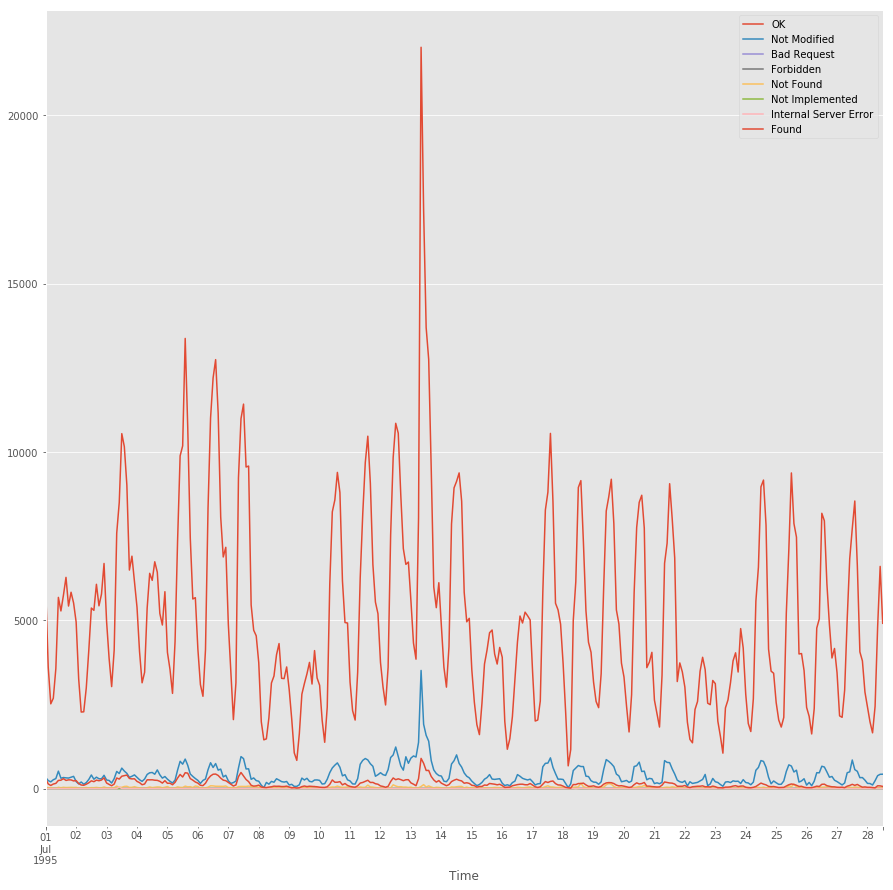

In [138]:
# Fill code here

newDF[[u'OK', u'Not Modified', u'Bad Request', u'Forbidden', u'Not Found',
       u'Not Implemented', u'Internal Server Error', u'Found']].plot(figsize=(15, 15))

In [ ]:
# Expected output

Show only Error and Redirection status codes as a stacked plot. You should show daily data. Use `.plot(kind='barh',stacked=True,figsize=(10,7))`

In [140]:

codeMap = {
200 : "OK",
302 : "Found",
304 : "Not Modified",
400 : "Bad Request",
403 : "Forbidden" ,
404 : "Not Found",
500 : "Internal Server Error",
501 : "Not Implemented"
}

statusMap = {}
for key in codeMap.keys():
    indexing = df[["Status"]] == key
    tmp = df[["Status"]][indexing].resample("1D").count()
    tmp.columns = [codeMap[key]]
    statusMap[key] = tmp

In [142]:
newDF = pd.DataFrame(index=statusMap[200].index)
for key in codeMap.keys():
    newDF.loc[:, codeMap[key]] = statusMap[key]

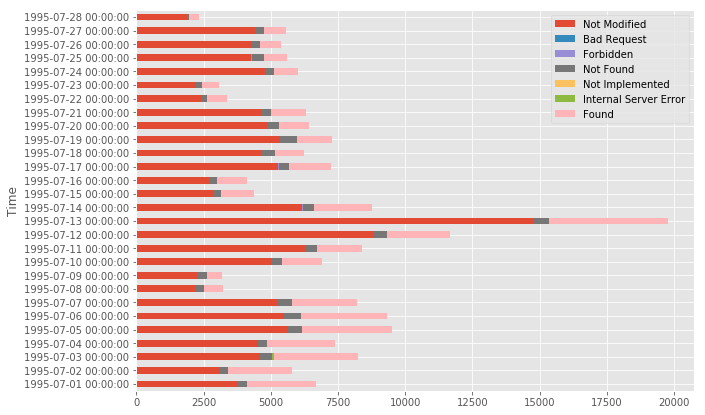

In [143]:
newDF[[u'Not Modified', u'Bad Request', u'Forbidden', u'Not Found',
       u'Not Implemented', u'Internal Server Error', u'Found']].plot(kind='barh',stacked=True, figsize=(10, 7))
# Fill code here

In [ ]:
# Expected output

But there is a better way to receive statistics about different groups of values. Here we group our data by *Status* by using `.groupby()`

In [14]:
# Fill code here
grouped_status = df.groupby(['Status'])

Data are now rearranged in to several groups, each corresponding to a certain value of *Status* (here, only the first two values of every group are shown):

In [157]:
grouped_status.head(2)

,Status,b,IP,Request
Time,,,,
1995-07-01 00:00:01,200,0.005956,199.72.81.55,GET /history/apollo/ HTTP/1.0
1995-07-01 00:00:06,200,0.003800,unicomp6.unicomp.net,GET /shuttle/countdown/ HTTP/1.0
1995-07-01 00:00:11,304,0.000000,burger.letters.com,GET /shuttle/countdown/liftoff.html HTTP/1.0
1995-07-01 00:00:12,304,0.000000,burger.letters.com,GET /images/NASA-logosmall.gif HTTP/1.0
1995-07-01 00:01:06,302,0.000105,205.189.154.54,"GET /cgi-bin/imagemap/countdown?99,176 HTTP/1.0"
1995-07-01 00:01:12,404,NaN,dd15-062.compuserve.com,GET /news/sci.space.shuttle/archive/sci-space-...
1995-07-01 00:01:53,302,0.000105,remote27.compusmart.ab.ca,"GET /cgi-bin/imagemap/countdown?102,174 HTTP/1.0"
1995-07-01 00:10:19,404,NaN,netport-27.iu.net,GET /pub/winvn/readme.txt HTTP/1.0
1995-07-02 00:55:38,403,NaN,pc0135.metrolink.net,GET /shuttle/missions/sts-71/images/images/eks...


We can count the number of values in each group:

In [15]:
# Fill code here
grouped_status.count()

,b,IP,Request
Status,,,
200,1701451,1701534,1701534
302,37847,46573,46573
304,132627,132627,132627
400,0,5,5
403,0,54,54
404,1,10845,10845
500,62,62,62
501,0,14,14


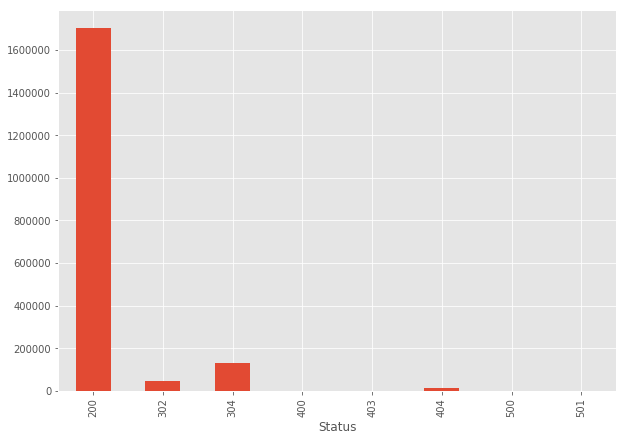

In [34]:
grouped_status.size().plot(kind="bar", figsize=(10, 7))

In [ ]:
# Expected output

## Part 5 : IPs

Now I want to group by IPs and calculate how many requests we get from each of them: 

In [46]:
# Fill code here
grouped_ip = df.groupby(['IP'])
count = grouped_ip.count()[["Request"]]

In [56]:
sorted_ip = count.sort_values(by="Request", ascending=False).head(10)

Show top 10 IPs and number of requests as a bar chart.

In [57]:
# Fill code here
sorted_ip

,Request
IP,
piweba3y.prodigy.com,17572
piweba4y.prodigy.com,11591
piweba1y.prodigy.com,9868
alyssa.prodigy.com,7852
siltb10.orl.mmc.com,7573
piweba2y.prodigy.com,5922
edams.ksc.nasa.gov,5434
163.206.89.4,4906
news.ti.com,4863


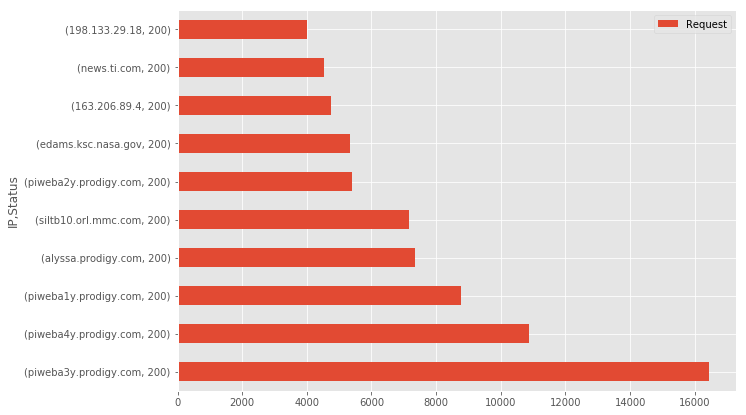

In [82]:
sorted_ip.plot(kind="barh", figsize=(10, 7))

In [ ]:
# Expected output

I just want to have a nice table with the top 10 IPs, so I convert them to Data Frame :)

In [61]:
# Fill code here
df_ip = pd.DataFrame(sorted_ip)
df_ip

,Request
IP,
piweba3y.prodigy.com,17572
piweba4y.prodigy.com,11591
piweba1y.prodigy.com,9868
alyssa.prodigy.com,7852
siltb10.orl.mmc.com,7573
piweba2y.prodigy.com,5922
edams.ksc.nasa.gov,5434
163.206.89.4,4906
news.ti.com,4863


In [ ]:
# Expected output

We also can group by both *IP* and *Status*. Try and produce the bar chart as shown below.

In [33]:
# Fill code here
grouped_ip = df.groupby(['IP', 'Status'])

In [34]:
sorted_ip = grouped_ip.count()[["Request"]].sort_values(by="Request", ascending=False).head(10)

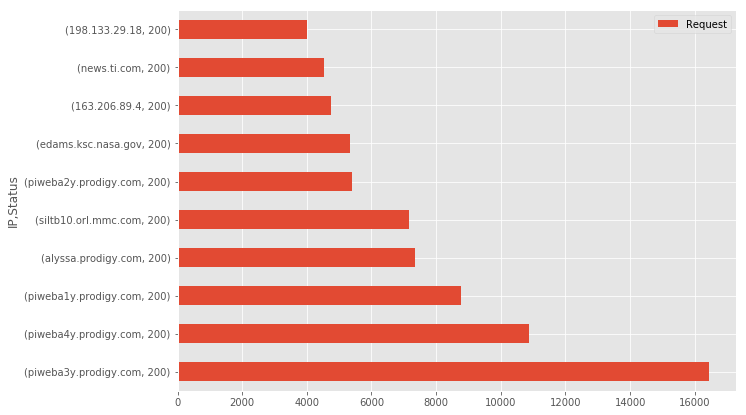

In [35]:
sorted_ip.plot(kind="barh", figsize=(10, 7))

In [ ]:
# Expected output

## Part 6: Geographical information

In this part, you will further analyze the log file by cross-checking the ip/hostname with GeoIP data. This will let you know the geographical origin of the request.

You will be 'pygeoip' package, which can be easily installed by `conda install -c chuongdo pygeoip=0.3.1`

In [9]:
import pygeoip
gi = pygeoip.GeoIP('data/GeoIP.dat', pygeoip.MEMORY_CACHE)

In [10]:
from socket import gaierror

One of the challenges for this part is that some entries are not the IP addresses but hostnames. Here is excerpt from pygeoip API. You can use these function to get the country code.

```
country_code_by_addr(addr) -- Returns 2-letter country code (e.g. US) from IP address.
    Parameters:	addr – IP address (e.g. 203.0.113.30)

country_code_by_name(hostname) -- Returns 2-letter country code (e.g. US) from hostname.
    Parameters:	hostname – Hostname (e.g. example.com)
```

** Caution: Looking up IP addresses can be extremely slow. It's okay to do this on a subset of data **

In [87]:
# Fill code here

Create Data Frame similar to what shown below

In [11]:
# Fill code here
lst = [
    "b10rn101.remote.ingr.com",
    "194.21.12.40",
    "ccas-slip2.saicyt.net.ve",
    "stanton-1-1.cloverleaf.com",
    "kosh-141b.berkeley.edu"
]

In [12]:
def getCode(x):
    x = str(x)
    if re.match(r'\d+.\d+.\d+', x) == None:
        try:
            return gi.country_code_by_name(x)
        except gaierror:
            return "UNKNOWN"
    else:
        return gi.country_code_by_addr(x)

In [42]:
code = pd.Series( [getCode(val) for val in lst],index=lst,name = "code")

In [43]:
pd.DataFrame(code)

,code
b10rn101.remote.ingr.com,UNKNOWN
194.21.12.40,IT
ccas-slip2.saicyt.net.ve,UNKNOWN
stanton-1-1.cloverleaf.com,UNKNOWN
kosh-141b.berkeley.edu,UNKNOWN


In [30]:
counter = {}
for val in code:
    counter[val] = counter.get(val, 0) + 1

In [100]:
ips = np.array(df["IP"])
idx = np.array([np.random.rand() < 0.0001 for ip in ips])

In [101]:
ips_indexed = ips[idx]

In [102]:
len(ips_indexed)

171

In [103]:
sub_df = pd.DataFrame(ips_indexed, columns=["IP"])

In [104]:
sub_df.head()

,IP
0,crl7.crl.com
1,xslip36.csrv.uidaho.edu
2,hpsystem5.informatik.tu-muenchen.de
3,dialup806.washington.mci.net
4,solair1.inter.nl.net


In [105]:
lst = sub_df["IP"]
code = pd.Series( [getCode(val) for val in lst],name = "code")

In [106]:
sub_df["code"] = code

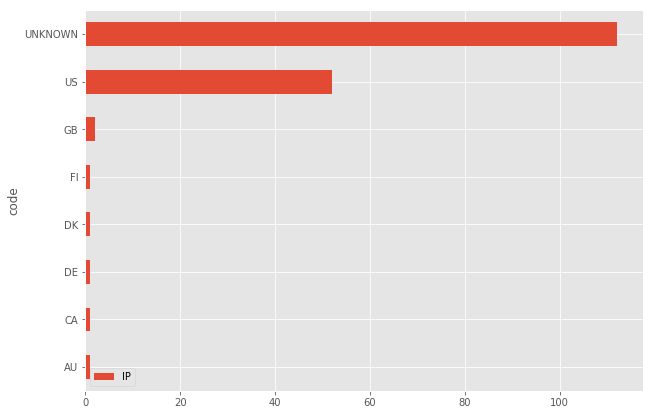

In [107]:
sub_df.groupby("code").count().sort_values(by="IP", ascending=True).plot(kind='barh', figsize=(10, 7))

In [ ]:
# Expected output

Credit: This exercise is based on a notebook by Nikolay Koldunov [koldunov.net](http://koldunov.net)